# Practical motivation
According to the World Health Organization, Heart diseases, also known as cardiovascular diseases (CVDs) are the number 1 cause of death around the world. An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Hence, we would like to find out more information on how heart diseases arises, and to see how we can reduce it.



Given a set of data, we would like to model how likely it is to get heart disease.


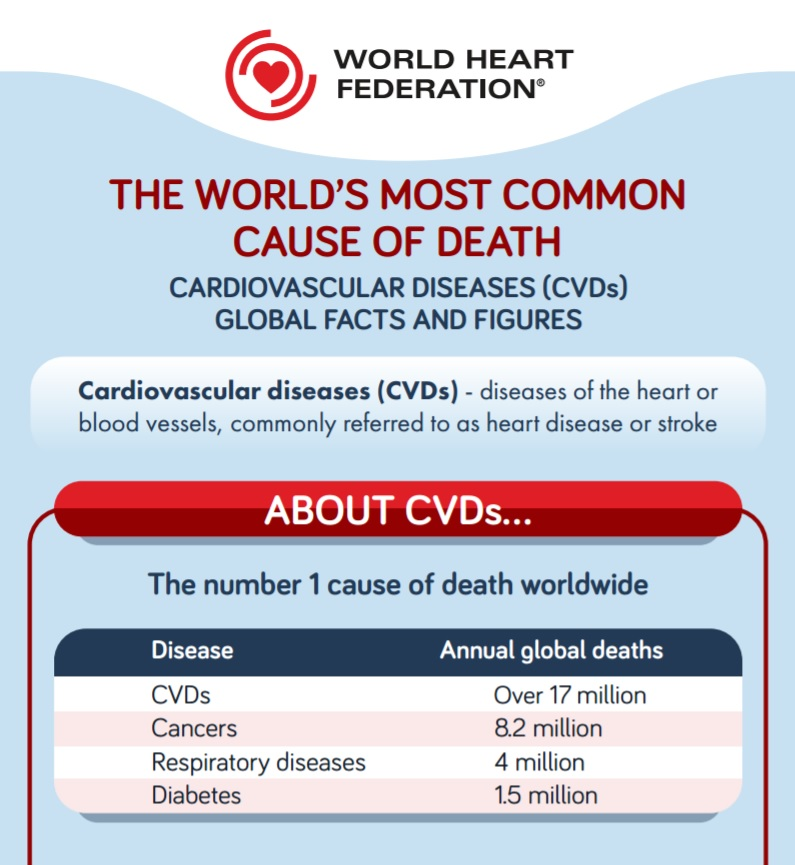

# Problem definition:
To predict the likelihood of someone getting cardiovascular disease


### Importing python libraries/data

In [112]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [113]:
data = pd.read_csv("cardio.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Cleaning of data

The dataset contains information about patients doing cardiovascular disease examination.

From the data, we see that there are no null values

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
age| Age of the patient |(in days)   
gender| Gender of the patient| (1 - women, 2 - men)     
height| Height of the patient| (in cm)        
ap_hi| Systolic blood pressure      
ap_lo| Diastolic blood pressure     
cholesterol| cholestrol category| (1: normal, 2: above normal, 3: well above normal)       
gluc| glucose category| (1: normal, 2: above normal, 3: well above normal)      
smoke| Whether patient smoke| (0: Non-smoker, 1: Smoker)   
alco| Whether patient drinks alcohol| (0: Non-drinker, 1: Drinker)    
active| Whether patient is active in exercising| (0: Non-active, 1: Active) 
cardio| Presence/Absence of cardiovascular disase| (0: Absence, 1: Presence)

In [115]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Observations:    
We see a couple of issues in the dataset
 
* min and max height values may be unrealistic
* min and max weight values may be unrealistic
* ap_hi and ap_lo have negative values (not possible) and unrealisticly high max values


In order to match the variables with our stroke dataset subsequently, there are some additional steps to do

* Convert age from days to years
* Combine height and weight into a new BMI column
* Combine ap_hi and ap_lo into a new hypertension column
* Drop columns that will not be used


We will proceed with resolving the issues first

---
### Removing outliers from height, weight, ap_hi, ap_lo columns

We assume that 5% of the dataset are outliers, and remove the entries that lie in the top 2.5% and bottom 2.5%, this will remove the unrealistic min and max values as well

Note: We will not consider outliers for age, as min age = 10798 days = 29 years, while max age = 23713 days = 64 years, which are realistic values

In [116]:
height_outliers = data[(data['height'] > data['height'].quantile(0.975)) | 
                  (data['height'] < data['height'].quantile(0.025))].index

weight_outliers = data[(data['weight'] > data['weight'].quantile(0.975)) | 
                  (data['weight'] < data['weight'].quantile(0.025))].index

aphi_outliers   = data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | 
                  (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index

aplo_outliers   = data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | 
                  (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index

In [117]:
toremove = set(list(height_outliers) + list(weight_outliers) + list(aphi_outliers) + list(aplo_outliers))
len(toremove)

8906

In [118]:
data.drop(toremove, inplace=True)

In [119]:
# Check that the min and max values of the columns have changed
# New total count should be 70000 - 8906 = 61094

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,19476.633041,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685
std,28846.600883,2459.569651,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935
min,0.000000,10798.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24853.250000,17692.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49887.500000,19708.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74738.500000,21327.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


--- 
### Removing invalid ap_lo and ap_hi entries
Even though we already removed the outliers, we still need to check for all the entries that the systolic blood pressure (ap_hi) cannot be lower than the diastolic blood pressure (ap_lo)

In [120]:
invalid = data[(data['ap_hi'] < data['ap_lo'])].index
invalid

Int64Index([], dtype='int64')

We see that by removing the outliers, the invalid entries have also been removed as well. No need for additional work to be done

---

Next, we perform the additional steps in order to match our stroke dataset

### To convert age columns from days to years

In [121]:
data['age'] = data['age'].apply(lambda x: x//365)

In [122]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


---

### Combining height and weight into a single BMI column
In reality, BMI is another good indicator to determine how healthy an individual is. A normal healthy BMI should have a range of 18.5 to 25.

Formula for BMI = mass in kg / (height in m) ** 2 

In [123]:
data["bmi"] = data.apply(lambda x: x["weight"] / ((x["height"]/100)*(x["height"]/100) ), axis=1)

In [124]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685,27.206710
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935,4.478431
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740741
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


--- 
### Combining ap_hi and ap_lo into a single hypertension column
![title](img/hypertension.png)

We will use the above image as reference to determine whether the patient has hypertension.       

We notice that the values are being stored as integers, this could be due to the values being rounded when storing the values. Therefore, instead of comparing value >= threshold, we will instead compare value > threshold instead.

* Patients with a systolic blood pressure (ap_hi) > 130 will be considered as hypertension.    

* Patients with a diastolic blood pressure (ap_lo) > 80 will be considered as hypertension.      

In [125]:
data["hypertension"] = data.apply(lambda x: 1 if (x['ap_hi'] > 130 or x['ap_lo'] > 80) else 0, axis=1)

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,hypertension
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,49885.960536,52.861656,1.347334,164.538645,73.515243,126.149736,81.148558,1.354356,1.220807,0.085868,0.052231,0.803500,0.491685,27.206710,0.338102
std,28846.600883,6.745516,0.476127,6.843466,11.847502,14.302501,8.325156,0.672474,0.567816,0.280171,0.222494,0.397355,0.499935,4.478431,0.473067
min,0.000000,29.000000,1.000000,150.000000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740741,0.000000
25%,24853.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,49887.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585,0.000000
75%,74738.500000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863,1.000000
max,99999.000000,64.000000,2.000000,180.000000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000,1.000000


--- 
### Dropping unnecessary columns
Finally, we drop the id column as it is not needed in our model, height and weight columns since we already have a BMI column, ap_hi and ap_lo columns since we already have a hypertension column. 

Additionally, our stroke dataset does not contain cholesterol, alcohol or active variables, hence we will be dropping them as well.

In [126]:
for i in ['id', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'alco', 'active']:
    data.drop([i], axis='columns', inplace=True)

data.describe()

,age,gender,gluc,smoke,cardio,bmi,hypertension
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,52.861656,1.347334,1.220807,0.085868,0.491685,27.206710,0.338102
std,6.745516,0.476127,0.567816,0.280171,0.499935,4.478431,0.473067
min,29.000000,1.000000,1.000000,0.000000,0.000000,15.740741,0.000000
25%,48.000000,1.000000,1.000000,0.000000,0.000000,23.875115,0.000000
50%,53.000000,1.000000,1.000000,0.000000,0.000000,26.259585,0.000000
75%,58.000000,2.000000,1.000000,0.000000,1.000000,29.760863,1.000000
max,64.000000,2.000000,3.000000,1.000000,1.000000,48.000000,1.000000


### Encoding gender variable

In [127]:
#Encoding the Gender variable

genders = pd.get_dummies(data.gender)
genders.rename(columns={1: "female", 2: "male"}, inplace=True)


#Concat to our original dataframe
data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)
data.describe()

,age,gluc,smoke,cardio,bmi,hypertension,female,male
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,52.861656,1.220807,0.085868,0.491685,27.206710,0.338102,0.652666,0.347334
std,6.745516,0.567816,0.280171,0.499935,4.478431,0.473067,0.476127,0.476127
min,29.000000,1.000000,0.000000,0.000000,15.740741,0.000000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,0.000000,23.875115,0.000000,0.000000,0.000000
50%,53.000000,1.000000,0.000000,0.000000,26.259585,0.000000,1.000000,0.000000
75%,58.000000,1.000000,0.000000,1.000000,29.760863,1.000000,1.000000,1.000000
max,64.000000,3.000000,1.000000,1.000000,48.000000,1.000000,1.000000,1.000000


In [130]:
cardio = data.copy()

%store cardio

Stored 'cardio' (DataFrame)


This will be the cleaned dataset used for our subsequent models

---
### Visualising the new dataset

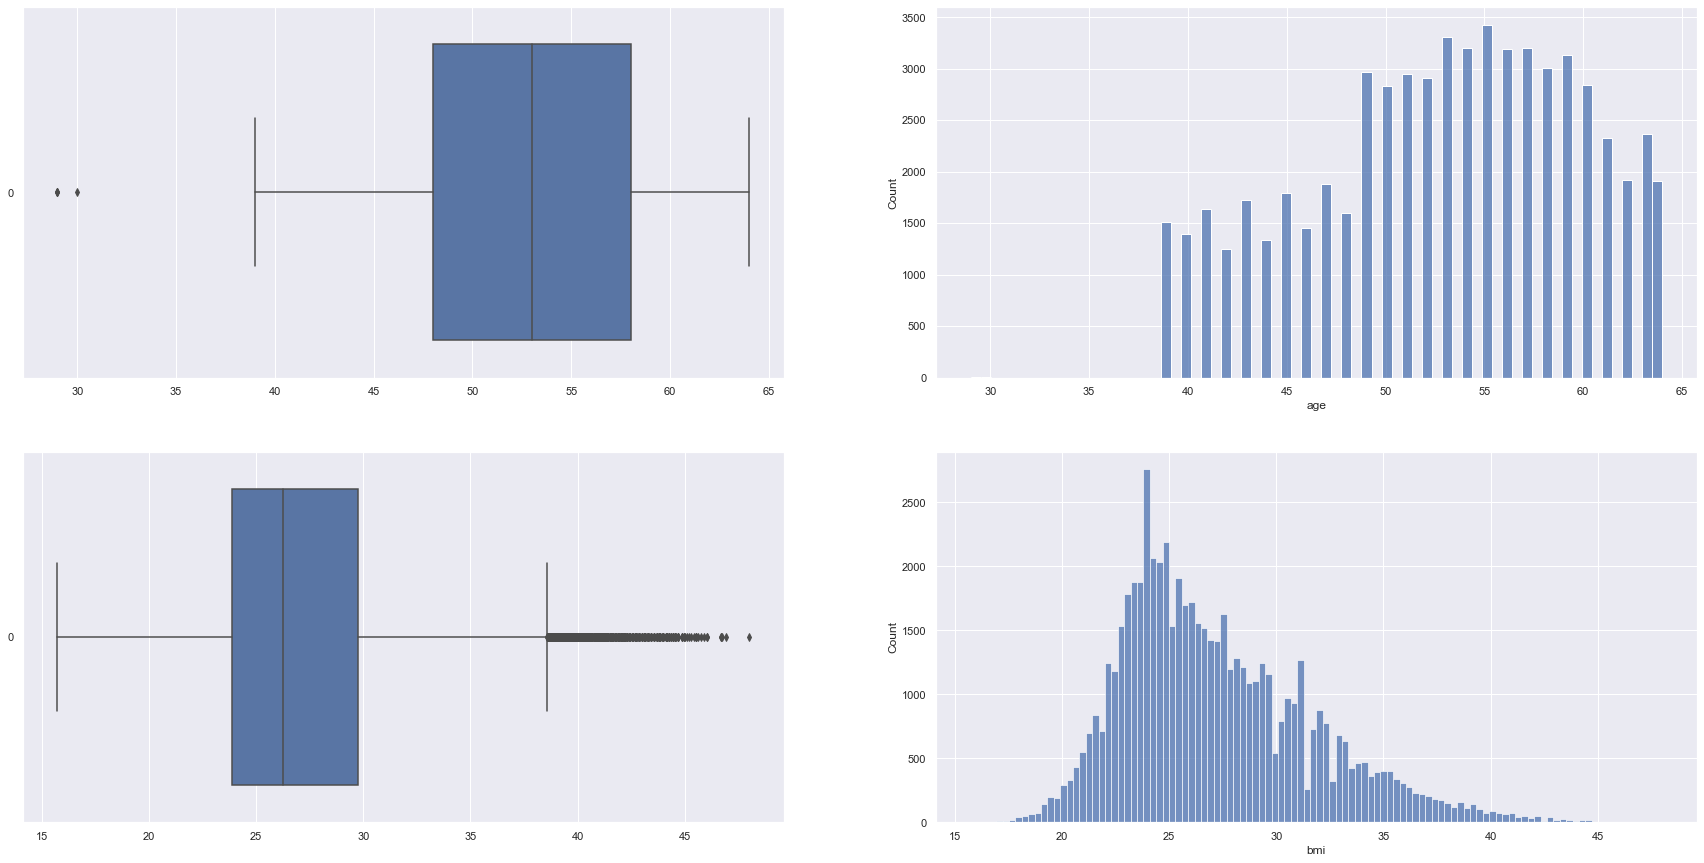

In [92]:
#Visualing the numeric variables
f,axes = plt.subplots(2, 2, figsize=(30, 15))

for i,val in enumerate(["age", "bmi"]):
    sb.boxplot(data = data[val], orient = "h", ax = axes[i][0])
    sb.histplot(data = data[val], ax = axes[i][1])

### Observations:
...

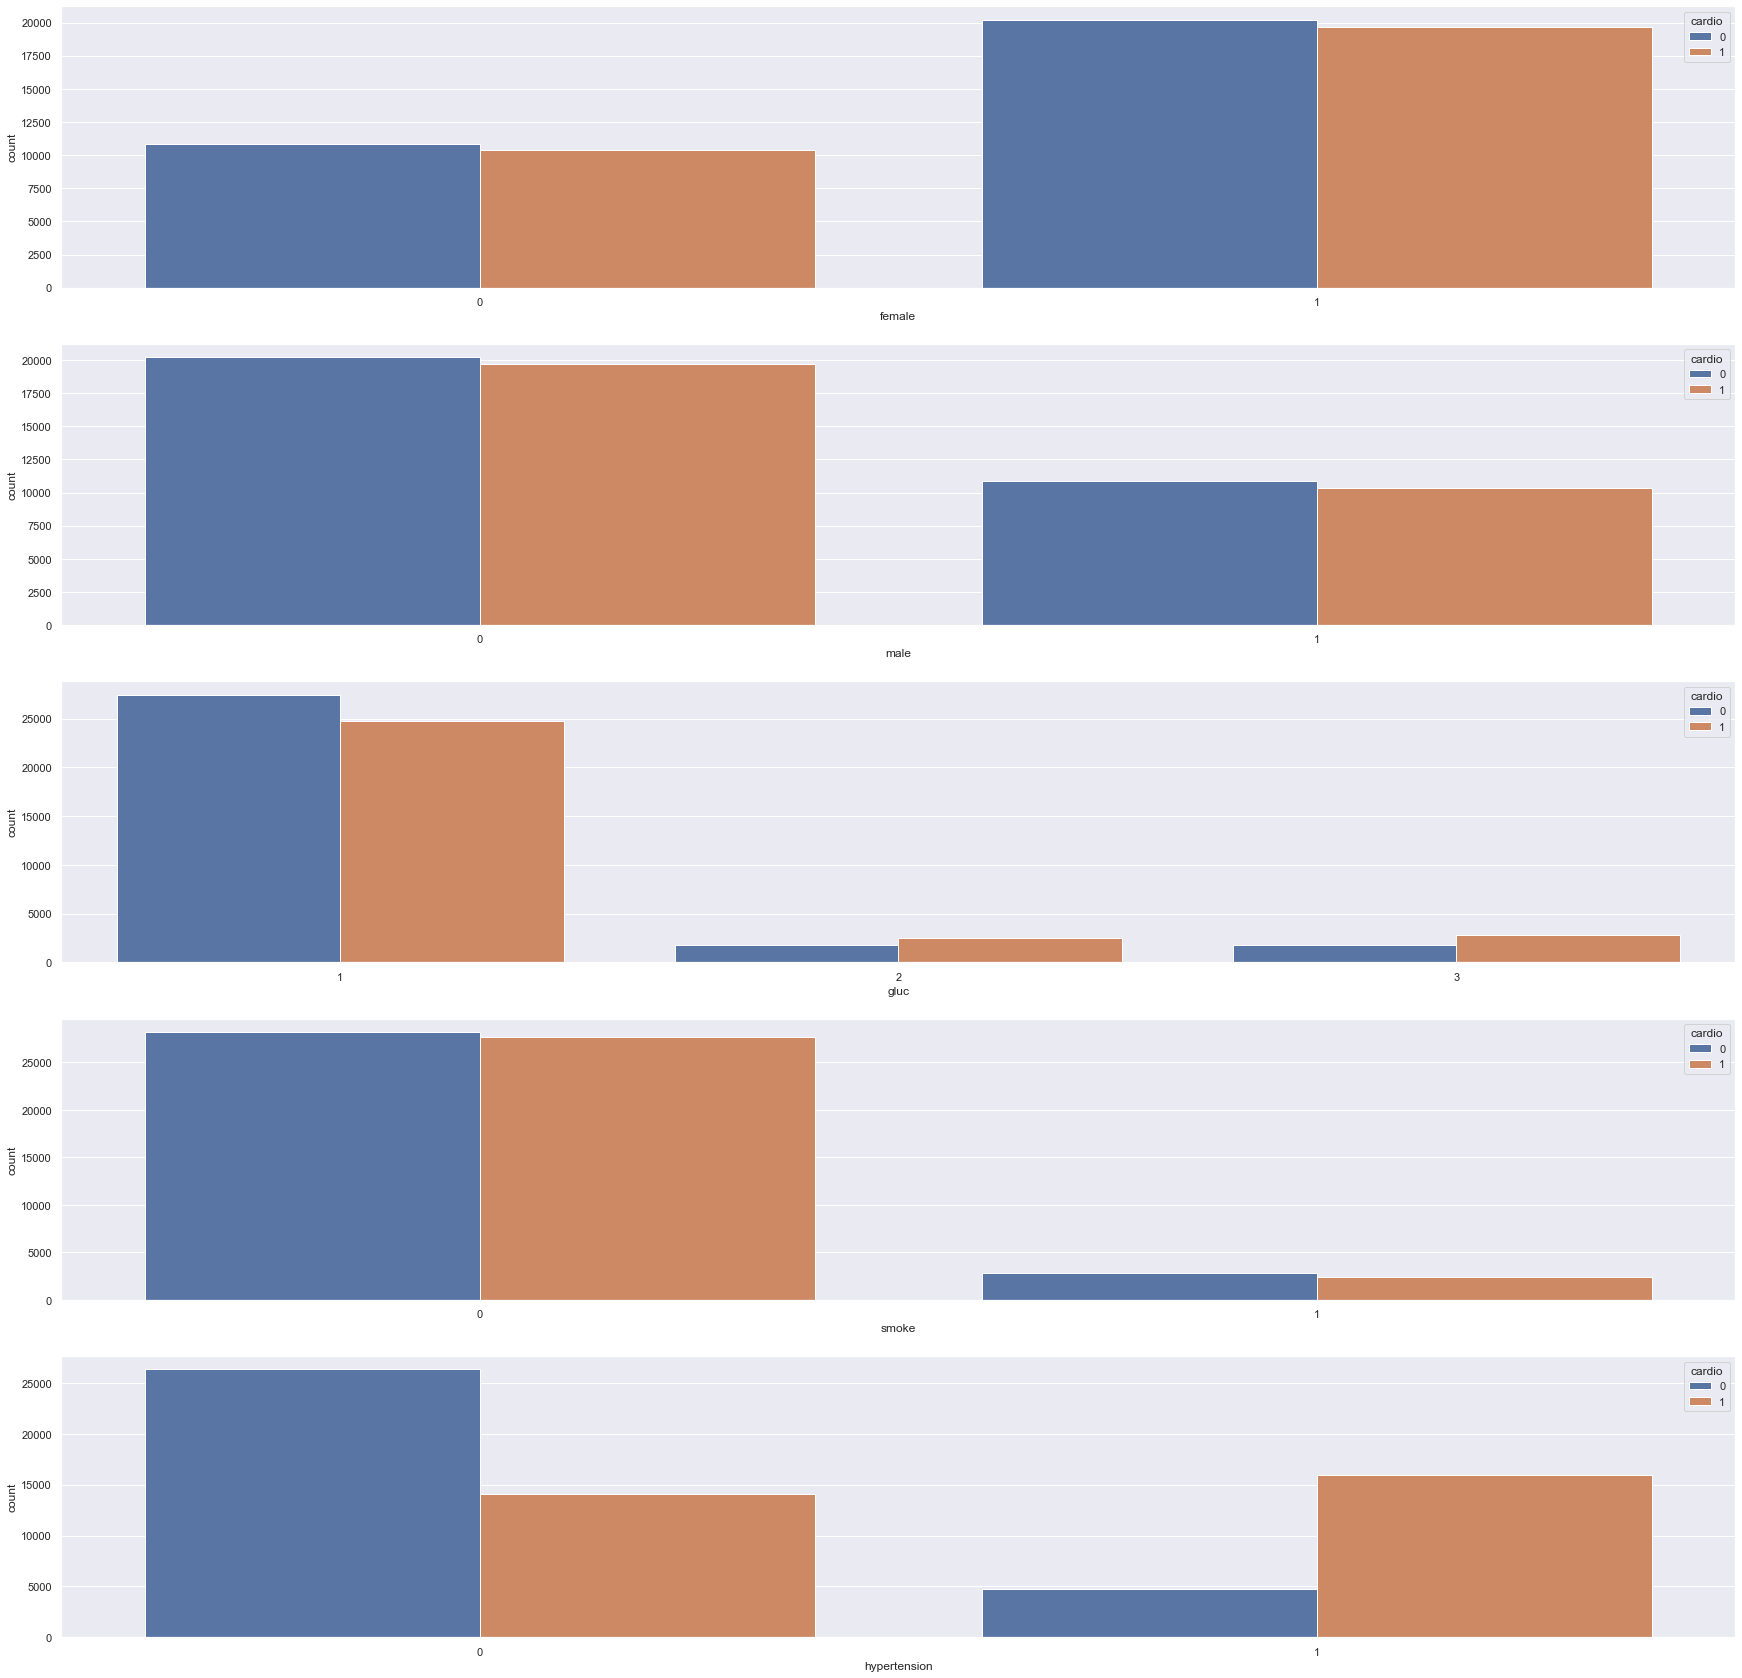

In [93]:
#Visualising the categorical variables with target variable
f ,axes = plt.subplots(5, 1, figsize=(30, 30))

for i,val in enumerate(["female", "male", "gluc", "smoke", "hypertension"]):
    sb.countplot(x=val, hue="cardio", data=data, ax=axes[i]);

### Observations:
... 

---
## Model 1: Binary Classification

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [95]:
X = data.drop("cardio", axis=1)
y = data.cardio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4294967295)

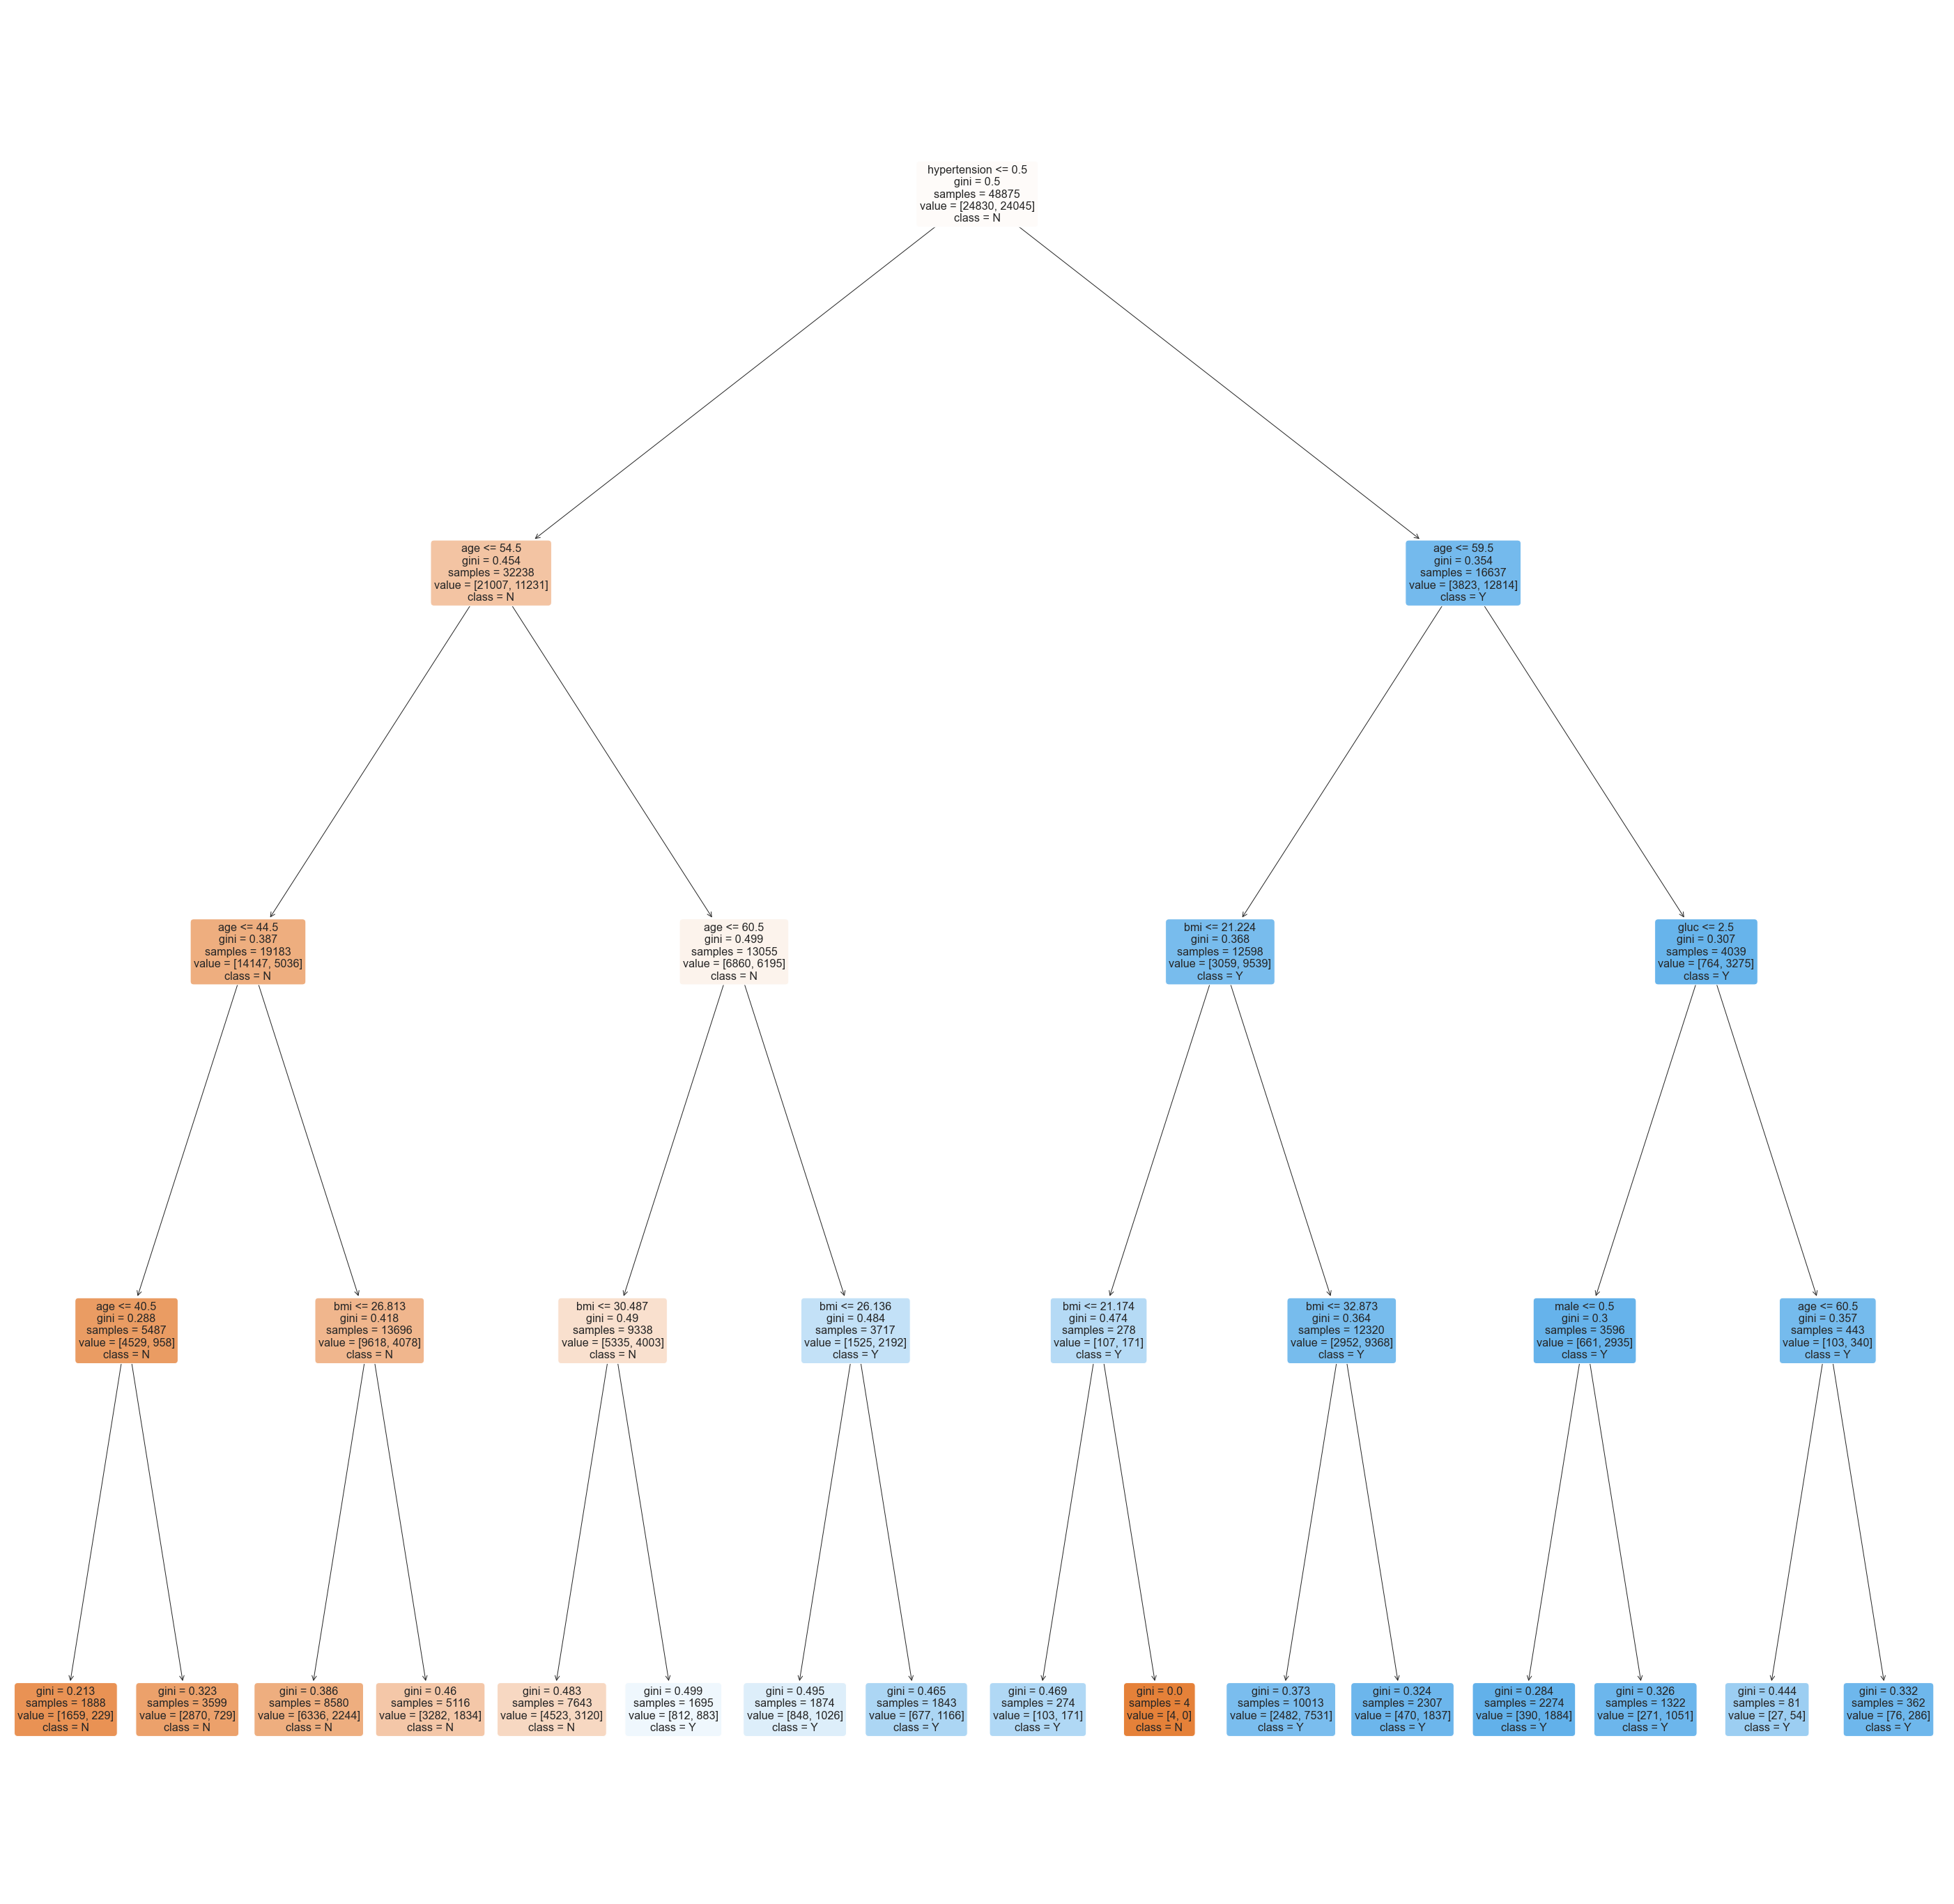

In [96]:
tree = DecisionTreeClassifier(max_depth = 4)  
tree.fit(X_train, y_train)                    

f = plt.figure(figsize=(50,50))
if 1:
    plot_tree(tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["N","Y"])

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.70717

TPR Train	: 0.66080
TNR Train	: 0.75207

FPR Train	: 0.24793
FNR Train	: 0.33920


<AxesSubplot:>

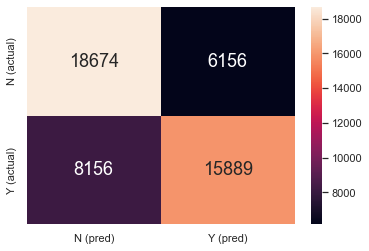

In [97]:
y_train_pred = tree.predict(X_train)

xlabels = ["N (pred)","Y (pred)"]
ylabels = ["N (actual)","Y (actual)"]

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {tree.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.70701

TPR Test	: 0.64915
TNR Test	: 0.76273

FPR Test	: 0.23727
FNR Test	: 0.35085


<AxesSubplot:>

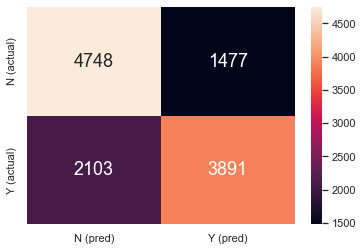

In [98]:
y_test_pred = tree.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {tree.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

---

## Model 2: Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 6)      # set the maximum depth of each tree

forest.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=6, n_estimators=200)

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.71206

TPR Train	: 0.65394
TNR Train	: 0.76834

FPR Train	: 0.23166
FNR Train	: 0.34606


<AxesSubplot:>

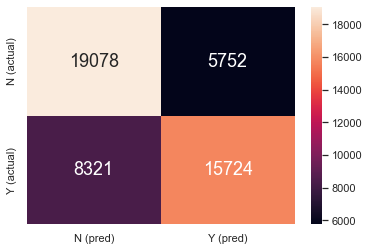

In [100]:
y_train_pred = forest.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {forest.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.70955

TPR Test	: 0.63447
TNR Test	: 0.78185

FPR Test	: 0.21815
FNR Test	: 0.36553


<AxesSubplot:>

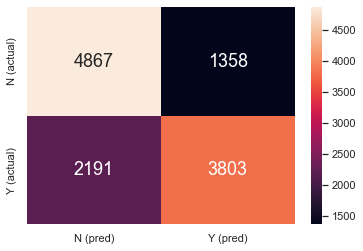

In [101]:
y_test_pred = forest.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {forest.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

---

## Model 3: Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', C=10)

logr.fit(X_train, y_train.ravel())

LogisticRegression(C=10, max_iter=1000)

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.70474

TPR Train	: 0.60378
TNR Train	: 0.80250

FPR Train	: 0.19750
FNR Train	: 0.39622


<AxesSubplot:>

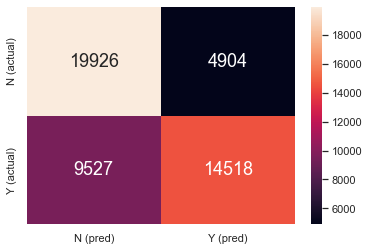

In [103]:
y_train_pred = logr.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {logr.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.70554

TPR Test	: 0.59126
TNR Test	: 0.81558

FPR Test	: 0.18442
FNR Test	: 0.40874


<AxesSubplot:>

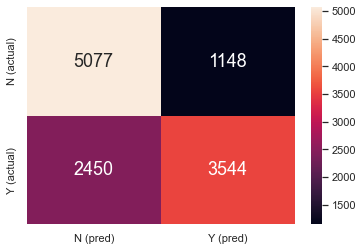

In [104]:
y_test_pred = logr.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {logr.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

---

## Model 4: XGBoost

In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier(use_label_encoder=False, objective="binary:logistic", disable_default_eval_metric=True)
xgb_cl.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

-------------------------Confusion Matrix on Train Set-------------------------
Accuracy	: 0.73043

TPR Train	: 0.68164
TNR Train	: 0.77769

FPR Train	: 0.22231
FNR Train	: 0.31836


<AxesSubplot:>

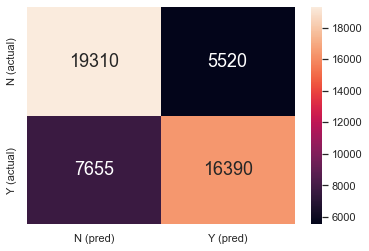

In [106]:
y_train_pred = xgb_cl.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {xgb_cl.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

-------------------------Confusion Matrix on Test Set-------------------------
Accuracy	: 0.70382

TPR Test	: 0.64231
TNR Test	: 0.76305

FPR Test	: 0.23695
FNR Test	: 0.35769


<AxesSubplot:>

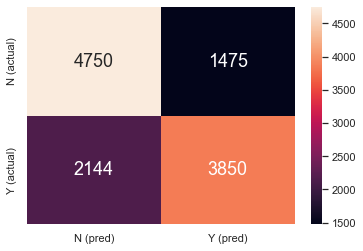

In [107]:
y_test_pred = xgb_cl.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {xgb_cl.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

### Observations:


Model 1: Binary Classification 
* Train: 70.717%
* Test : 70.701%

Model 2: Random Forest
* Train: 71.204%
* Test : 70.971%

Model 3: Logistic Regression
* Train: 70.474%
* Test : 70.554%

Model 4: XGBoost
* Train: 73.043%
* Test : 70.382%

Comparing the results above, we see the test data of the 4 models performed similarly at about 70% classification accuracy.
Comparing the train data, our 4th model performed the best at 73%.
Therefore, we will use the XGBoost model and perform hyperparameter tuning

---


### Hyperparameter Tuning of XGBoost with GridSearchCV

In [108]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    'reg_lambda' : np.arange(0.5, 1.5, 0.1),
    'reg_alpha' : np.arange(0,0.6,0.1),
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": np.arange(0.5,1,0.1),
}

In [110]:
from sklearn.model_selection import GridSearchCV
#clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')

search = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, n_jobs=-1, scoring = 'accuracy', cv = 4 )
search.fit(X_train, y_train.ravel())

print('best score:/n',search.best_score_)
print('bestparams:/n' ,search.best_params_)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy")

# Fit
_ = grid_cv.fit(X_train, y_train.ravel())

In [ ]:
grid_cv.best_score_

In [ ]:
grid_cv.best_params_

In [ ]:
# We set some of the values in param_grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["max_depth"] = [4]

#define a second set of parameters to do the tuning
param_grid["gamma"] = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid["reg_lambda"] = [50, 60, 70, 80, 90, 100]
param_grid["learning_rate"] = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [ ]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(X_train, y_train.ravel())

In [ ]:
grid_cv_2.best_score_

In [ ]:
grid_cv_2.best_params_

In [ ]:
# We use the params for the grid_cv_2 as it showed improvement in the parameter tuning

final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

final_cl.fit(X_train, y_train.ravel())

In [ ]:
y_train_pred = final_cl.predict(X_train)

print('-'*25 + "Confusion Matrix on Train Set" + '-'*25)
print(f"Accuracy\t: {final_cl.score(X_train, y_train):.5f}")
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print(f"TPR Train\t: {tpTrain/(tpTrain + fnTrain):.5f}")
print(f"TNR Train\t: {tnTrain/(tnTrain + fpTrain):.5f}")
print()

print(f"FPR Train\t: {fpTrain/(tnTrain + fpTrain):.5f}")
print(f"FNR Train\t: {fnTrain/(tpTrain + fnTrain):.5f}")

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)

In [ ]:
y_test_pred = final_cl.predict(X_test)

print('-'*25 + "Confusion Matrix on Test Set" + '-'*25)
print(f"Accuracy\t: {final_cl.score(X_test, y_test):.5f}")
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print(f"TPR Test\t: {tpTest/(tpTest + fnTest):.5f}")
print(f"TNR Test\t: {tnTest/(tnTest + fpTest):.5f}")
print()

print(f"FPR Test\t: {fpTest/(tnTest + fpTest):.5f}")
print(f"FNR Test\t: {fnTest/(tpTest + fnTest):.5f}")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, 
           xticklabels=xlabels, yticklabels=ylabels)